In [2]:
################################################          KNN            #####################################################

In [ ]:
#importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [5]:
matplotlib inline

In [6]:
mobile_dataset = pd.read_csv('dataSet.csv')

In [7]:
mobile_dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
print((mobile_dataset[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]==0).sum())


battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
dtype: int64


In [9]:
mobile_dataset.fillna(mobile_dataset.mean(),inplace=True)

In [10]:
print(mobile_dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

In [13]:
dataTransform = mobile_dataset.copy()

In [14]:
# transfer data into an order
for data in mobile_dataset.columns:
    dataTransform[data]=labelencoder.fit_transform(mobile_dataset[data])

In [15]:
dataTransform

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,1,0,5,5,108,1,...,18,186,963,4,7,17,0,0,1,1
1,382,1,0,1,0,1,51,6,56,2,...,738,1099,998,12,3,5,1,1,0,2
2,48,1,0,1,2,1,39,8,65,4,...,962,901,984,6,2,7,1,1,0,2
3,88,1,20,0,0,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,954,1,7,0,13,1,42,5,61,1,...,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,...,939,1022,180,8,4,17,1,1,0,0
1996,1064,1,21,1,0,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1027,0,4,1,1,1,34,6,28,7,...,716,834,1158,4,1,3,1,1,0,3
1998,732,0,4,0,4,1,44,0,65,4,...,283,120,266,13,10,17,1,1,1,0


In [16]:
# spilt data x- inputs
x=dataTransform.drop(['price_range'],axis=1)


In [17]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,255,0,17,0,1,0,5,5,108,1,2,18,186,963,4,7,17,0,0,1
1,382,1,0,1,0,1,51,6,56,2,6,738,1099,998,12,3,5,1,1,0
2,48,1,0,1,2,1,39,8,65,4,6,962,901,984,6,2,7,1,1,0
3,88,1,20,0,0,0,8,7,51,5,9,935,954,1055,11,8,9,1,0,0
4,954,1,7,0,13,1,42,5,61,1,14,928,517,499,3,2,13,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,14,939,1022,180,8,4,17,1,1,0
1996,1064,1,21,1,0,0,37,1,107,3,3,745,1080,732,6,10,14,1,1,1
1997,1027,0,4,1,1,1,34,6,28,7,3,716,834,1158,4,1,3,1,1,0
1998,732,0,4,0,4,1,44,0,65,4,5,283,120,266,13,10,17,1,1,1


In [18]:
#  y- output
y= dataTransform['price_range']

In [19]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [20]:
#inputs as a features list 
mobile_feature_list= list(x.columns)

In [21]:
mobile_feature_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [22]:
# spilt data into trainning and testing data
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [24]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1519,611,1,25,0,3,0,58,7,100,1,4,67,43,1392,0,2,7,1,0,0
1068,434,1,0,0,4,0,43,4,117,0,5,146,545,134,4,1,8,1,1,0
631,410,1,6,0,0,1,24,7,21,4,2,928,532,1477,12,16,3,1,0,1
508,61,0,17,0,0,0,57,6,105,4,6,665,819,1073,14,17,7,0,0,1
1006,314,0,0,1,11,0,11,2,79,0,15,231,51,330,3,4,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1078,0,0,1,2,1,27,7,97,0,13,262,1039,1499,7,10,16,1,0,0
1104,359,1,13,1,4,1,53,6,44,0,12,38,415,626,3,5,8,1,0,1
1932,164,1,11,1,1,1,28,3,13,2,12,562,357,569,5,9,10,1,1,1
931,62,0,0,1,3,0,25,1,88,2,10,796,677,909,14,2,0,1,1,1


In [25]:
x_train.shape

(1600, 20)

In [26]:
y_train.shape

(1600,)

In [27]:
x_test.shape

(400, 20)

In [28]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
KNNClassifier=KNeighborsClassifier(n_neighbors=8)

In [30]:
KNNClassifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
# make predictions using test data

prediction_y =KNNClassifier.predict(x_test)

In [32]:
prediction_y


array([1, 2, 2, 2, 1, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2,
       3, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0, 3, 2, 0, 2, 3,
       1, 1, 0, 1, 1, 0, 2, 0, 2, 3, 0, 3, 1, 2, 3, 3, 0, 3, 2, 0, 3, 2,
       0, 2, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 0, 2, 3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 2, 2, 2, 1, 1, 0, 2, 2, 3,
       2, 0, 3, 2, 3, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 1, 0, 0, 0, 2, 3, 1, 0, 1, 3, 3, 1, 2, 2, 3, 2, 3,
       2, 0, 2, 3, 3, 0, 3, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 1, 2, 3, 3,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 3, 3, 0, 1,
       0, 0, 0, 3, 3, 3, 2, 0, 2, 1, 0, 2, 1, 0, 3, 0, 1, 1, 3, 1, 0, 2,
       3, 2, 2, 0, 0, 3, 2, 1, 2, 2, 1, 1, 1, 1, 0, 3, 2, 3, 3, 0, 0, 1,
       0, 3, 0, 2, 1, 3, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 3, 0, 0, 3, 3, 1,
       2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1, 2, 1, 2,

In [33]:
# check accuracy and generate clssification report

experiment_accuracy=sm.accuracy_score(y_test,prediction_y)
print('Accuracy score is : ',str(experiment_accuracy))

Accuracy score is :  0.9075


In [34]:
from sklearn import metrics

In [35]:
print("Classification Report : ",metrics.classification_report(prediction_y,y_test,target_names=['0','1','2','3']))

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.93      0.95       101
           1       0.86      0.91      0.89        93
           2       0.91      0.83      0.87       109
           3       0.89      0.97      0.93        97

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [36]:
# confusion metrics
from sklearn.metrics import confusion_matrix

In [37]:
import seaborn as sb

In [38]:
sb.set()

In [39]:
get_ipython().run_line_magic('matplotlib','inline')

In [40]:
import matplotlib.pyplot as pt

In [41]:
confusion = confusion_matrix(y_test,prediction_y) 

Text(110.44999999999997, 0.5, 'predicted class axis')

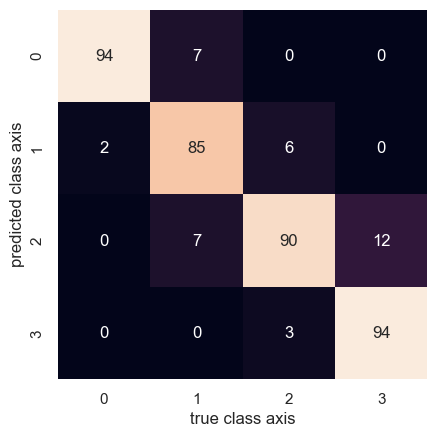

In [44]:
sb.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class axis')
pt.ylabel('predicted class axis')

In [45]:
################################################   Multi-Layered            #####################################################


In [46]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np 

In [47]:
df = pd.read_csv('dataSet.csv')

In [48]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [49]:
Array_dataset = df.values

In [50]:
Array_dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [51]:
X = Array_dataset[:,0:20]
Y = Array_dataset[:,20]

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [53]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [54]:
Y = df['price_range']

In [55]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [56]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2 , random_state=42)

In [57]:
X_val_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36272545, 0.        , 0.52      , ..., 1.        , 1.        ,
        1.        ],
       [0.15163661, 0.        , 0.88      , ..., 1.        , 1.        ,
        1.        ],
       [0.45691383, 0.        , 0.56      , ..., 1.        , 1.        ,
        1.        ]])

In [58]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [59]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [61]:
model.fit(X_train,Y_train,validation_data=(X_val, Y_val),epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 8ms/step - loss: 1.3755 - accuracy: 0.2850 - val_loss: 1.3533 - val_accuracy: 0.3300
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3434 - accuracy: 0.3506 - val_loss: 1.3187 - val_accuracy: 0.3750
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3076 - accuracy: 0.3862 - val_loss: 1.2787 - val_accuracy: 0.4100
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2553 - accuracy: 0.4456 - val_loss: 1.2115 - val_accuracy: 0.4800
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 1.1797 - accuracy: 0.4944 - val_loss: 1.1269 - val_accuracy: 0.5700
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 1.0772 - accuracy: 0.5669 - val_loss: 1.0159 - val_accuracy: 0.6250
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9615 - accuracy: 0.6500 - val_loss: 0.9048 - val_accuracy: 0.6800
Epoch 8/50
50/50 [==

In [62]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [63]:
X_train.shape

(1600, 20)

In [64]:
# evaluation on test set
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9650


[0.15516380965709686, 0.9649999737739563]

In [65]:
# creates an array of predictions from a matrix of percentages of classifications
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [67]:
 #testing our cross val sets
prediction_Y = model.predict(X_test)
testing_preds = predictionrelease(prediction_Y)

7/7 [==============================] - 0s 1ms/step


In [ ]:
# check accuracy and generate clssification report

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

#cross validation
print(classification_report(Y_test,testing_preds)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.98      0.95      0.96        42
           2       0.89      0.98      0.93        41
           3       1.00      0.94      0.97        62

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [69]:
#################################        Comparison of KNN and Multilayered Network      #######################################


In [70]:
import matplotlib.pyplot as plt

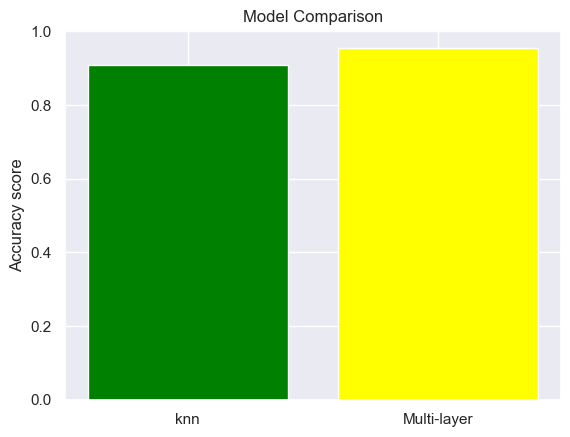

In [72]:
models = ['knn','Multi-layered']
acc_scores = [0.9075, 0.9550]

plt.bar(models, acc_scores, color=['green', 'yellow'])
plt.ylabel("Accuracy score")
plt.title("Model Comparison")
plt.show()